# Part 1

#### Importing libraries required for the project

In [1]:
!conda install -c anaconda beautifulsoup4 --yes
import bs4 as bs
import urllib.request
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - beautifulsoup4


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/w

##### calling the scrapper, reading the table and transforming the table into dataframe

In [2]:

source = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').read()
soup = bs.BeautifulSoup(source,'lxml')

#  find element table with class wikitable
table = soup.find('table', attrs={'class':'wikitable'})

# get the first table in the page
table = soup.find_all('table')

#dataframes have html parser for tables
df = pd.read_html(str(table))[0]



df.head()


,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


#### removing the not assigned boroughs, select the indexes of the rows that match the criteria and dropped them and reset the index

In [3]:

indexNames = df[df['Borough'] == 'Not assigned'].index
 
df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)

df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [4]:
 df[df['Neighborhood'] == ''].head()

,Postal code,Borough,Neighborhood


#### Replacing value of neighborhood with Borough when it's empty (though there isn't any)

In [5]:
df['Neighborhood'].apply(lambda i: i if len(i)>0 else df['Borough'])

df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


#### Grouping together neighborhoods with the same postalcode and putting commas (there are no duplicate postal codes)


In [6]:
df['Neighborhood'] = df.groupby('Postal code')['Neighborhood'].transform(lambda x: ','.join(x))
df.head()


,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


#### printing shape

In [7]:
print(df.shape)

(103, 3)


# Part 2

#### Importing coordinates into separate dataframe of postal codes

In [8]:

df_postal = pd.read_csv('https://cocl.us/Geospatial_data')
df_postal.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merging previous dataframe with postalcodes dataframe with postalcode as the key

In [9]:
df3 = pd.merge(
    df,
    df_postal,
    left_on=['Postal code'],
    right_on=['Postal Code'],
    suffixes=('_left','_right')    
)

df3.head()


,Postal code,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,M5A,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,M6A,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,M7A,43.662301,-79.389494


# Part 3

In [10]:
np.random.seed(0)

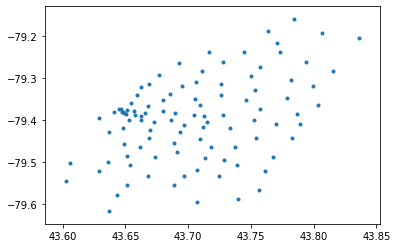

In [11]:
plt.scatter(df3['Latitude'], df3['Longitude'], marker='.')

#### Scale the input values in order to get better results

In [12]:
from sklearn.preprocessing import StandardScaler
X = df3.values[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.93187104,  0.69818881],
       [ 0.40749844,  0.84388426],
       [-0.96437519,  0.37773518],
       [ 0.26644077, -0.6993678 ],
       [-0.81034434,  0.07922652],
       [-0.7039597 , -1.39737754],
       [ 1.95523876,  2.09777597],
       [ 0.79103364,  0.465121  ],
       [ 0.03427589,  0.90216906],
       [-0.90879146,  0.18842596],
       [ 0.09518258, -0.49568547],
       [-1.0279041 , -1.62993333],
       [ 1.53094905,  2.44798852],
       [ 0.40783172,  0.58164715],
       [-0.17744183,  0.81474393],
       [-1.01735586,  0.22482887],
       [-0.20737226, -0.32106485],
       [-1.1701819 , -1.86243118],
       [ 1.12942801,  2.15613628],
       [-0.54111407,  1.07704414],
       [-1.14613182,  0.24667041],
       [-0.29846415, -0.58298336],
       [ 1.271543  ,  1.86437197],
       [ 0.0852875 ,  0.3486083 ],
       [-0.89364811,  0.10106496],
       [-0.67165797, -0.26285143],
       [ 1.3126078 ,  1.6310228 ],
       [ 1.89922981,  0.3486083 ],
       [ 0.95236034,

#### model the data

In [13]:
from sklearn.cluster import KMeans 

clusterNum = 8
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[7 2 5 1 5 6 4 7 2 5 1 6 4 2 2 5 1 6 4 2 5 3 4 2 5 5 4 7 1 2 5 3 4 7 0 2 5
 5 4 7 1 2 5 5 2 7 0 2 5 0 0 4 7 0 2 1 3 0 2 1 0 1 1 3 0 4 1 1 1 3 0 2 1 1
 5 3 6 6 4 1 5 3 7 5 5 4 5 5 3 0 7 5 5 6 6 4 5 5 3 5 2 3 3]


In [14]:

k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

df3["Labels"] = labels
df3.head(5)

[[ 43.73345594 -79.52380495]
 [ 43.72811311 -79.42115333]
 [ 43.6969548  -79.32028644]
 [ 43.65535175 -79.48112341]
 [ 43.77424069 -79.23054032]
 [ 43.65711736 -79.38884535]
 [ 43.65676386 -79.56746421]
 [ 43.77734414 -79.35374718]]


,Postal code,Borough,Neighborhood,Postal Code,Latitude,Longitude,Labels
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656,7
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572,2
2,M5A,Downtown Toronto,Regent Park / Harbourfront,M5A,43.654260,-79.360636,5
3,M6A,North York,Lawrence Manor / Lawrence Heights,M6A,43.718518,-79.464763,1
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,M7A,43.662301,-79.389494,5


In [15]:
# define the world map centered around Toronto with a low zoom level
canada_map = folium.Map(location=[43.651070, -79.347300], zoom_start=11)

points = folium.map.FeatureGroup()
df3['Labels'] = df3.Labels.apply(str)
np.random.seed(10)
cluster_color = {}
for cluster in range(clusterNum):
    cluster_color[cluster]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color
    
# loop through the clusters
for lat, lng, lab in zip(df3.Latitude, df3.Longitude, df3.Labels):
    points.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color=cluster_color[int(lab)],
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup = lab
        ))


canada_map.add_child(points)
canada_map


#### Cultural Hotspot dataset provided by the city of toronto

In [16]:
poi_df = pd.read_csv('CULTURAL_HOTSPOT_WGS84.csv', encoding = 'ISO-8859-1')
poi_df.head()

,WKT,PNT_OF_INT,DESCRPTION,SOCIAL_MED,WEBSITE,CATEGORY,LOCATION,X,Y,LONGITUDE,LATITUDE,OBJECTID,RID
0,POINT (-79.257066555 43.772936248),21 Points in Equilibrium (Sculpture),This sculpture is by James Southerland. It is ...,NaN,NaN,Public Art,150 Borough Dr,324341.227,4847914.922,-79.257067,43.772936,75154,1
1,POINT (-79.2161703309953 43.7538063534814),Crucified Again (Sculpture),Crucified Again shows the body of a tortured m...,NaN,NaN,Public Art,450 Scarborough Golf Club Road,327641.001,4845799.116,-79.216170,43.753806,75155,2
2,POINT (-79.187369 43.783078),A Tall Couple (Sculpture),Louis Archambault (1915-2003) created A Tall C...,NaN,NaN,Public Art,"-79.187369, 43.783078",329947.860,4849060.368,-79.187369,43.783078,102997,3
3,POINT (-79.273286 43.693461),Warden Underpass Mural (Mural),The Warden Underpass Mural provides a visual h...,NaN,NaN,Public Art,"-79.273286, 43.693461",323059.616,4839081.887,-79.273286,43.693461,102998,4
4,POINT (-79.255266 43.700826),Sustenance (Mural),"Sustenance, also known as the ""Western Gateway...",NaN,NaN,Public Art,"-79.255266, 43.700826",324509.747,4839904.258,-79.255266,43.700826,102999,5


#### Dataset of restaurants in toronto

In [17]:
locs_df = pd.read_csv('shopsrestauranttoronto.csv')
# filter by pizza shops
locs_df = locs_df[locs_df['NAME'].str.contains('pizza', na = False, case = False)] 
locs_df = locs_df.reset_index(drop=True)
locs_df.head()

,ID,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE
0,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842
1,10300086,115-PIZZA NOVA,Food Take Out,1 BLUE JAYS WAY,43.64168,-79.39012
2,10495816,2 4 1 Pizza,Food Take Out,1383 DAVENPORT RD,43.67276,-79.44105
3,9337469,2 OR 3 PIZZA & WINGS,Food Take Out,2382 LAKE SHORE BLVD W,43.61570,-79.48860
4,9000026,2-4-1 PIZZA,Food Take Out,2372 EGLINTON AVE E,43.73204,-79.27102


#### Function to find the closest cluster

In [18]:
from math import sin, cos, sqrt, atan2
from operator import itemgetter
def closestCluster(lan, long):
    R = 6373.0
    rows = []
    for cluster in k_means_cluster_centers:
        lat1 = cluster[0]
        lon1 = cluster[1]
        lat2 = lan
        lon2 = long

        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        distance = R * c
        rows.append(distance)
    return min(enumerate(rows), key=itemgetter(1))[0]

    

####  assign the cluster to the pizza shops to the closest cluster

In [19]:
locs_df['Labels'] = locs_df.apply(lambda row: closestCluster(row['LATITUDE'],row['LONGITUDE']), axis=1)


In [20]:
locs_df.head()

,ID,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE,Labels
0,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,1
1,10300086,115-PIZZA NOVA,Food Take Out,1 BLUE JAYS WAY,43.64168,-79.39012,5
2,10495816,2 4 1 Pizza,Food Take Out,1383 DAVENPORT RD,43.67276,-79.44105,3
3,9337469,2 OR 3 PIZZA & WINGS,Food Take Out,2382 LAKE SHORE BLVD W,43.61570,-79.48860,3
4,9000026,2-4-1 PIZZA,Food Take Out,2372 EGLINTON AVE E,43.73204,-79.27102,4


#### draw a map of pizza shops in toronto

In [21]:

locs_df['Labels'] = locs_df.Labels.apply(str)

for lat, lng, lab in zip(locs_df.LATITUDE, locs_df.LONGITUDE, locs_df.Labels):
    points.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, 
            color=cluster_color[int(lab)],
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup = lab
        ))


canada_map.add_child(points)
canada_map


#### Restaurants by cluster

In [22]:
locs_df['Labels'].value_counts()

5    144
3     80
4     77
2     71
0     70
1     65
7     35
6     27
Name: Labels, dtype: int64

#### Cluster identification for points of interests

In [23]:
df

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing CentrE
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...


In [24]:
poi_df['Labels'] = poi_df.apply(lambda row: closestCluster(row['LATITUDE'],row['LONGITUDE']), axis=1)


In [25]:
exclude_cat = (poi_df['CATEGORY'] != 'Public Art') & (poi_df['CATEGORY'] != 'Creative')  & (poi_df['CATEGORY'] != 'Business')
poi_df = poi_df[exclude_cat]
poi_df['Labels'].value_counts()

3    102
4     64
6     54
2     25
0      8
7      1
Name: Labels, dtype: int64

In [26]:

poi_df.head(100)

,WKT,PNT_OF_INT,DESCRPTION,SOCIAL_MED,WEBSITE,CATEGORY,LOCATION,X,Y,LONGITUDE,LATITUDE,OBJECTID,RID,Labels
28,POINT (-79.134593 43.774895),Chesterton Shores Park,Chesterton Shores Park is located east of Port...,NaN,http://www1.toronto.ca/parks/prd/facilities/co...,Park,"-79.134593,43.774895",334199.756,4848168.471,-79.134593,43.774895,37626,29,4
29,POINT (-79.185406 43.780004),Miller Lash House,The Miller Lash Estate is nestled in the pictu...,NaN,http://www.millerlashhouse.ca,Heritage,"-79.185406,43.780004",330107.140,4848719.428,-79.185406,43.780004,37627,30,4
36,POINT (-79.254642 43.757527),McCowan Log House,This cabin was built about 1830 in the northea...,NaN,NaN,Heritage,"-79.254642,43.757527",324541.470,4846203.564,-79.254642,43.757527,37615,37,4
37,POINT (-79.254768371582 43.7581710815429),Cornell House,"Built in 1858 in Scarborough Village, this was...",NaN,NaN,Heritage,"-79.254768371582,43.7581710815429",324531.084,4846275.088,-79.254768,43.758171,37617,38,4
38,POINT (-79.2549821 43.7592247),Thomson Memorial Park,A 41.8 heactare park at Lawrence Ave East and ...,NaN,http://www1.toronto.ca/parks/prd/facilities/co...,Park,"-79.2549821,43.7592247",324513.531,4846392.089,-79.254982,43.759225,37618,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,POINT (-79.491232 43.651455),Old Mill Bridge,The Old Mill Bridge was erected in 1916 during...,NaN,NaN,Architecture,"-79.491232,43.651455",305491.397,4834390.541,-79.491232,43.651455,116478,237,3
237,POINT (-79.49164 43.648877),Old Mill Subway Station Bridge,The Old Mill Subway Station Bridge was complet...,NaN,NaN,Architecture,"-79.491640,43.648877",305458.496,4834104.147,-79.491640,43.648877,116479,238,3
238,POINT (-79.491983 43.648474),Bloor Street Bridge,"Built in 1924 in an Art Deco style, the Bloor ...",NaN,NaN,Architecture,"-79.491983,43.648474",305430.830,4834059.373,-79.491983,43.648474,116480,239,3
239,POINT (-79.471255 43.631889),Humber River Bicycle-Pedestrian Bridge,"Located at the mouth of the Humber River, this...",NaN,NaN,Architecture,"-79.471255,43.631889",307103.649,4832217.182,-79.471255,43.631889,116481,240,3
